In [10]:
import pandas as pd
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

In [2]:
credit = pd.read_csv('credito.csv')

In [3]:
credit.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
# making labels
credit['State'] = credit['Estado'].apply(lambda x: 1 if x=='bueno' else 0)

In [5]:
credit

,Estado,Antiguedad,Vivienda,Plazo,Edad,EstadoCivil,Registros,Trabajo,Gastos,Ingresos,Activos,Deuda,Cantidad,Precio,State
0,bueno,9,alquila,60,30,casado,no,freelance,73,129,0,0,800,846,1
1,bueno,17,alquila,60,58,viudo,no,fijo,48,131,0,0,1000,1658,1
2,malo,10,propietario,36,46,casado,sí,freelance,90,200,3000,0,2000,2985,0
3,bueno,0,alquila,60,24,soltero,no,fijo,63,182,2500,0,900,1325,1
4,bueno,0,alquila,36,26,soltero,no,fijo,46,107,0,0,310,910,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4034,malo,1,alquila,60,39,casado,no,fijo,69,92,0,0,900,1020,0
4035,bueno,22,propietario,60,46,casado,no,fijo,60,75,3000,600,950,1263,1
4036,malo,0,propietario,24,37,casado,no,tiempo parcial,60,90,3500,0,500,963,0
4037,bueno,0,alquila,48,23,soltero,no,freelance,49,140,0,0,550,550,1


In [15]:
X, y = credit[['Plazo','Gastos', 'Ingresos', 'Activos', 'Deuda', 'Precio']], credit['State']
# Dividir en conjunto de entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verificar distribución de clases
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

State
1    0.745899
0    0.254101
Name: proportion, dtype: float64
State
1    0.746287
0    0.253713
Name: proportion, dtype: float64


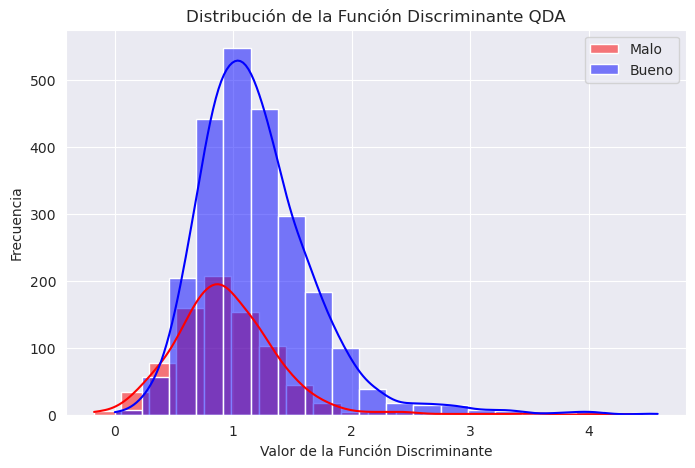

In [16]:
# Inicializar y entrenar el modelo QDA
qda = LinearDiscriminantAnalysis()
qda.fit(X_train, y_train)

# Transformar los datos para visualizar la función discriminante
X_train_qda = qda.decision_function(X_train)
X_test_qda = qda.decision_function(X_test)

# Visualizar la distribución de la función discriminante
plt.figure(figsize=(8, 5))
sns.histplot(X_train_qda[y_train == 0], color="red", label="Malo", kde=True, bins=20)
sns.histplot(X_train_qda[y_train == 1], color="blue", label="Bueno", kde=True, bins=20)
plt.title("Distribución de la Función Discriminante QDA")
plt.xlabel("Valor de la Función Discriminante")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

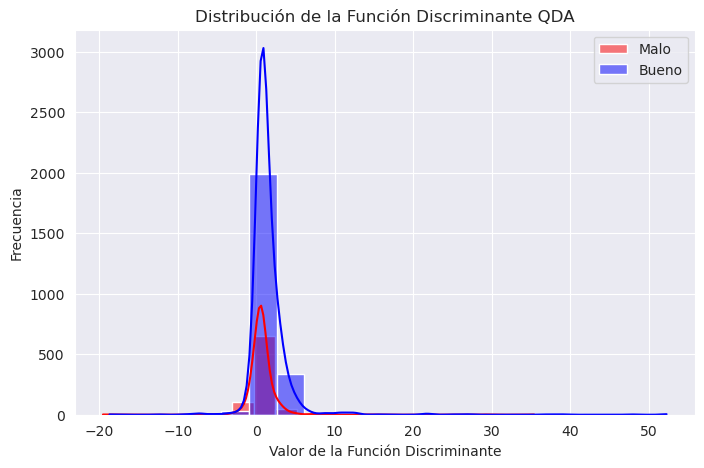

In [9]:
# Inicializar y entrenar el modelo QDA
qda = QuadraticDiscriminantAnalysis(reg_param=0.3)
qda.fit(X_train, y_train)

# Transformar los datos para visualizar la función discriminante
X_train_qda = qda.decision_function(X_train)
X_test_qda = qda.decision_function(X_test)

# Visualizar la distribución de la función discriminante
plt.figure(figsize=(8, 5))
sns.histplot(X_train_qda[y_train == 0], color="red", label="Malo", kde=True, bins=20)
sns.histplot(X_train_qda[y_train == 1], color="blue", label="Bueno", kde=True, bins=20)
plt.title("Distribución de la Función Discriminante QDA")
plt.xlabel("Valor de la Función Discriminante")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()


Precisión del modelo QDA: 0.7426


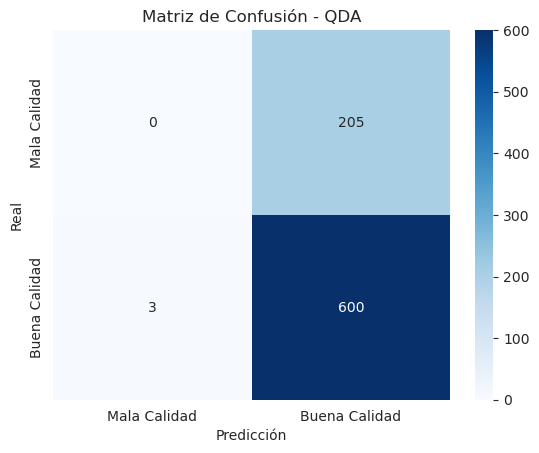

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       205
           1       0.75      1.00      0.85       603

    accuracy                           0.74       808
   macro avg       0.37      0.50      0.43       808
weighted avg       0.56      0.74      0.64       808



In [17]:
# Hacer predicciones en el conjunto de prueba
y_pred_qda = qda.predict(X_test)

# Calcular precisión y reporte de clasificación
accuracy_qda = accuracy_score(y_test, y_pred_qda)
print(f"Precisión del modelo QDA: {accuracy_qda:.4f}")

# Mostrar matriz de confusión
conf_matrix_qda = confusion_matrix(y_test, y_pred_qda)
sns.heatmap(conf_matrix_qda, annot=True, fmt="d", cmap="Blues", xticklabels=["Mala Calidad", "Buena Calidad"], yticklabels=["Mala Calidad", "Buena Calidad"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - QDA")
plt.show()

# Mostrar métricas detalladas
print(classification_report(y_test, y_pred_qda))


Precisión del modelo QDA: 0.7450


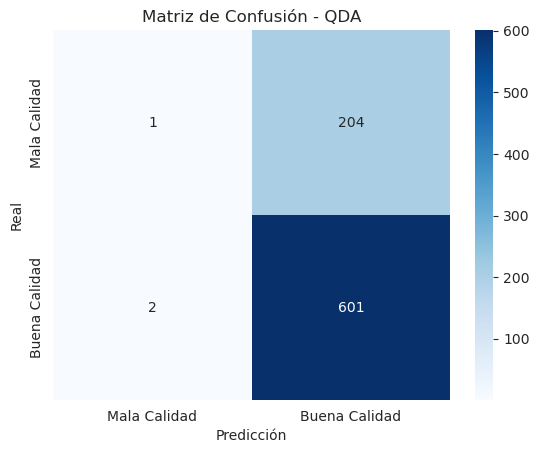

              precision    recall  f1-score   support

           0       0.33      0.00      0.01       205
           1       0.75      1.00      0.85       603

    accuracy                           0.75       808
   macro avg       0.54      0.50      0.43       808
weighted avg       0.64      0.75      0.64       808



In [13]:
# Hacer predicciones en el conjunto de prueba
y_pred_qda = qda.predict(X_test)

# Calcular precisión y reporte de clasificación
accuracy_qda = accuracy_score(y_test, y_pred_qda)
print(f"Precisión del modelo QDA: {accuracy_qda:.4f}")

# Mostrar matriz de confusión
conf_matrix_qda = confusion_matrix(y_test, y_pred_qda)
sns.heatmap(conf_matrix_qda, annot=True, fmt="d", cmap="Blues", xticklabels=["Mala Calidad", "Buena Calidad"], yticklabels=["Mala Calidad", "Buena Calidad"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - QDA")
plt.show()

# Mostrar métricas detalladas
print(classification_report(y_test, y_pred_qda))

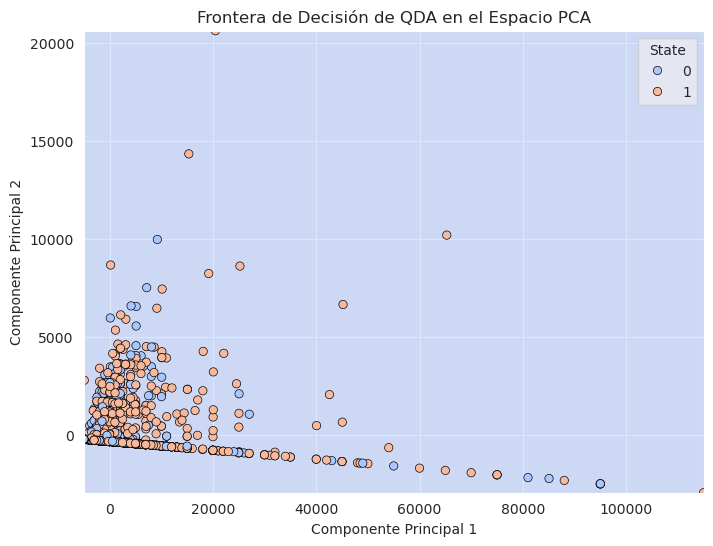

In [14]:
from sklearn.decomposition import PCA

# Reducir dimensiones con PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Aplicar QDA con las dos dimensiones principales
qda_pca = QuadraticDiscriminantAnalysis()
qda_pca.fit(X_train_pca, y_train)

# Crear malla de puntos para visualizar la frontera de decisión
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = qda_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar puntos y frontera de decisión
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette="coolwarm", edgecolor="black")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Frontera de Decisión de QDA en el Espacio PCA")
plt.show()
